inf
How Many Lenses Would You Like to Work With? (Max of 6): 2
What is the Focal Length of the 1st Lens: 20
What is the X-Coordinate of the 1st Lens: -40
Lens 1: Focal Length - 20.0 X-Coordinate - -40.0
What is the Focal Length of the 2nd Lens: 30
What is the X-Coordinate of the 2nd Lens: 10
Lens 2: Focal Length - 30.0 X-Coordinate - 10.0
What is the X-Coordinate of the Object: -70
What is the Y-Coordinate of the Object: 30
<class '__main__.lens'>
Image at 20.0 with a height of -60.0
1
<class '__main__.lens'>
Image at 17.5 with a height of -45.0
2


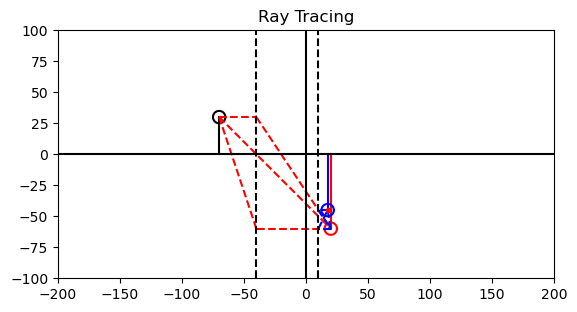

In [47]:
import matplotlib as mpl
import matplotlib.animation as animation 
import matplotlib.pyplot as plt
import numpy as np
import math

#creating a subplot 
figure, axes = plt.subplots( 1 ) 

print(abs(-1 * math.inf))
origin = [0,0]

colors = ['red', 'blue', 'magenta', 'yellow', 'cyan', 'black']

# ------- Defining Methods ---------
def draw_circle(x,y,r,c):
    angle = np.linspace( 0 , 2 * np.pi , 150 ) 
    x_res = x + r * np.cos( angle ) 
    y_res = y + r * np.sin( angle ) 
    axes.plot(x_res, y_res, color = c)
    
    
class lens:
    
    def __init__(self, focal, xcoordinate):
        self.focal = focal
        self.xcoordinate = xcoordinate
        
class objects:
    
    def __init__(self,coordinates):
        self.coordinates = coordinates
        self.xcoordinate = coordinates[0]
        self.ycoordinate = coordinates[1]
        self.prev_ycoordinate = 0
        
    
    def trace(self,lens,colorr):
        try:
            new_xcoordinate = lens.xcoordinate + ((lens.focal * (lens.xcoordinate - self.xcoordinate)) / ((lens.xcoordinate - self.xcoordinate) - lens.focal))
            if np.isnan(new_xcoordinate):
                new_xcoordinate = lens.xcoordinate + lens.focal
            
        except:
            new_xcoordinate = math.inf
        
        new_ycoordinate = (self.ycoordinate * ((lens.xcoordinate - new_xcoordinate) / (lens.xcoordinate - self.xcoordinate)))
            
            
        draw_circle(new_xcoordinate, new_ycoordinate, 5, colorr)
        if not np.isnan(new_ycoordinate):
            print(f"Image at {new_xcoordinate} with a height of {new_ycoordinate}")
        
        if not np.isnan(new_ycoordinate) and abs(new_xcoordinate) != math.inf:
            
            first_x_values = [self.xcoordinate, new_xcoordinate]
            first_y_values = [self.ycoordinate, new_ycoordinate]
            
            second_x_values_one = [self.xcoordinate, lens.xcoordinate]
            second_y_values_one = [self.ycoordinate, self.ycoordinate]
            second_x_values_two = [lens.xcoordinate, new_xcoordinate]
            second_y_values_two = [self.ycoordinate, new_ycoordinate]
            
            third_x_values_one = [new_xcoordinate, lens.xcoordinate]
            third_y_values_one = [new_ycoordinate, new_ycoordinate]
            third_x_values_two = [lens.xcoordinate, self.xcoordinate]
            third_y_values_two = [new_ycoordinate, self.ycoordinate]
            
            plt.plot(first_x_values, first_y_values, linestyle="--", color = colorr)
            plt.plot(second_x_values_one, second_y_values_one, linestyle="--", color = colorr)
            plt.plot(second_x_values_two, second_y_values_two, linestyle="--", color = colorr)
            plt.plot(third_x_values_one, third_y_values_one, linestyle="--", color = colorr)
            plt.plot(third_x_values_two, third_y_values_two, linestyle="--", color = colorr)
            
            da_line_x = [new_xcoordinate, new_xcoordinate]
            da_line_y = [new_ycoordinate, 0]
            plt.plot(da_line_x, da_line_y, color = colorr)
            
            
        
        self.ycoordinate = new_ycoordinate
        self.coordinates = [new_xcoordinate, new_ycoordinate]
        self.xcoordinate = new_xcoordinate
        

# ------ OBJECTS --------

while True:
    try:
        num_of_lenses = int(input("How Many Lenses Would You Like to Work With? (Max of 6): "))
        if num_of_lenses > 6:
            raise Exception("bad")
        break
    except:
        print("Error: Please Enter a Valid Number of Lenses")
        continue

lenses = []

for i in range (1,num_of_lenses + 1):
    while True:
        if i == 1:
            fl = (input(f"What is the Focal Length of the {i}st Lens: "))
        elif i == 2:
            fl = (input(f"What is the Focal Length of the {i}nd Lens: "))
        elif i == 3:
            fl = (input(f"What is the Focal Length of the {i}rd Lens: "))
        else:
            fl = (input(f"What is the Focal Length of the {i}th Lens: "))   
        try:
            fl = float(fl)
            break
        except:
            continue
        try:
            fl = int(fl)
            break
        except:
            print("Please Enter a Numeric Focal Length")
    
    while True:
        
        if i == 1:
            xc = (input(f"What is the X-Coordinate of the {i}st Lens: "))
        elif i == 2:
            xc = (input(f"What is the X-Coordinate of the {i}nd Lens: "))
        elif i == 3:
            xc = (input(f"What is the X-Coordinate of the {i}rd Lens: "))
        else:
            xc = (input(f"What is the X-Coordinate of the {i}th Lens: "))
            
        try:
            xc = float(xc)
            break
        except:
            continue
            
        try:
            xc = int(xc)
            break
        except:
            print("Please Enter a Numeric X-Coordinate")

    current_lens = lens(fl,xc)
    lenses.append(lens(fl,xc))
    print(f'Lens {i}: Focal Length - {current_lens.focal} X-Coordinate - {current_lens.xcoordinate}')
    

while True:
    obj1_x = input("What is the X-Coordinate of the Object: ")
    try:
        obj1_x = float(obj1_x)
        break
    except:
        continue
    try:
        obj1_x = int(obj1_x)
        break
    except:
        print('Error: Please Enter a Numerical X-Coordinate')


while True:
    obj1_y = input("What is the Y-Coordinate of the Object: ")
    try:
        obj1_y = float(obj1_y)
        break
    except:
        continue
        
    try:
        obj1_y = int(obj1_y)
        break
    except:
        print('Error: Please Enter a Numerical Y-Coordinate')
   
    

xbound = 200
ybound = 100
lens1 = lens(20, 40)
obj1 = objects([obj1_x, obj1_y])
draw_circle(obj1_x, obj1_y,5,"black")

og_x = [obj1_x, obj1_x]
og_y = [obj1_y, 0]
            
plt.plot(og_x, og_y, color = "black")








# ------- Running Code -------



col = 0
for j in lenses:
    
    if abs(obj1.ycoordinate) != math.inf:   
        obj1.prev_ycoordinate = obj1.ycoordinate
    print(type(j))
    print(j)
    obj1.trace(j, colors[col])
    if np.isnan(obj1.ycoordinate):
        print(obj1.prev_ycoordinate)
        obj1.ycoordinate = -obj1.prev_ycoordinate *(j.focal / previous_lens.focal)
        print(f"Image at {obj1.xcoordinate} with a height of {obj1.ycoordinate} ran in for loop")
    previous_lens = j
    col = col + 1
    print(col)
        





# ------- Plotting --------

plt.axhline(0, color='black')
plt.axvline(0, color='black')

for k in lenses:
      plt.plot([k.xcoordinate, k.xcoordinate], [(-1 * ybound), ybound], color = 'black', linestyle = '--')

plt.plot([obj1.xcoordinate],[obj1.ycoordinate], marker = 'o', markersize = 3, color = 'red')

axes.set_aspect( 1 ) 
plt.xlim( (-1 * xbound) , xbound )
plt.ylim( (-1 * ybound) , ybound ) 

plt.title('Ray Tracing')
plt.show()

